In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Let's Start!

# **Importing Libraries** <a id="1"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Importing Dataset** <a id="2"></a>

In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,NaN,never_smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never_smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never_smoked,0
5106,44873,Female,81.0,0,0,Yes,Self_employed,Urban,125.20,40.0,never_smoked,0
5107,19723,Female,35.0,0,0,Yes,Self_employed,Rural,82.99,30.6,never_smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly_smoked,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**There are null values present in 'bmi'.**

In [6]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

**We replaced null values of 'bmi' with mean in that column.**

In [8]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**After checking, as you can see there are no null values present in our column.**

In [9]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
dataset.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [11]:
print(dataset.groupby(['gender']).count())

          id   age  hypertension  heart_disease  ever_married  work_type  \
gender                                                                     
Female  2994  2994          2994           2994          2994       2994   
Male    2115  2115          2115           2115          2115       2115   
Other      1     1             1              1             1          1   

        Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
gender                                                                   
Female            2994               2994  2994            2994    2994  
Male              2115               2115  2115            2115    2115  
Other                1                  1     1               1       1  


In [12]:
print(dataset.groupby(['work_type']).count())

                 id  gender   age  hypertension  heart_disease  ever_married  \
work_type                                                                      
Govt_job        657     657   657           657            657           657   
Never_worked     22      22    22            22             22            22   
Private        2925    2925  2925          2925           2925          2925   
Self_employed   819     819   819           819            819           819   
children        687     687   687           687            687           687   

               Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
work_type                                                                       
Govt_job                  657                657   657             657     657  
Never_worked               22                 22    22              22      22  
Private                  2925               2925  2925            2925    2925  
Self_employed             819     

In [13]:
print(dataset.groupby(['smoking_status']).count())

                   id  gender   age  hypertension  heart_disease  \
smoking_status                                                     
Unknown          1544    1544  1544          1544           1544   
formerly_smoked   885     885   885           885            885   
never_smoked     1892    1892  1892          1892           1892   
smokes            789     789   789           789            789   

                 ever_married  work_type  Residence_type  avg_glucose_level  \
smoking_status                                                                
Unknown                  1544       1544            1544               1544   
formerly_smoked           885        885             885                885   
never_smoked             1892       1892            1892               1892   
smokes                    789        789             789                789   

                  bmi  stroke  
smoking_status                 
Unknown          1544    1544  
formerly_smoked   88

In [14]:
print(dataset.groupby(['ever_married']).count())

                id  gender   age  hypertension  heart_disease  work_type  \
ever_married                                                               
No            1757    1757  1757          1757           1757       1757   
Yes           3353    3353  3353          3353           3353       3353   

              Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
ever_married                                                                   
No                      1757               1757  1757            1757    1757  
Yes                     3353               3353  3353            3353    3353  


In [15]:
print(dataset.groupby(['Residence_type']).count())

                  id  gender   age  hypertension  heart_disease  ever_married  \
Residence_type                                                                  
Rural           2514    2514  2514          2514           2514          2514   
Urban           2596    2596  2596          2596           2596          2596   

                work_type  avg_glucose_level   bmi  smoking_status  stroke  
Residence_type                                                              
Rural                2514               2514  2514            2514    2514  
Urban                2596               2596  2596            2596    2596  


In [16]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,28.893237,never_smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never_smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.000000,never_smoked,1


# **Data Preprocessing** <a id="4"></a>

In [17]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [18]:
x

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly_smoked'],
       ['Female', 61.0, 0, ..., 202.21, 28.893236911794666,
        'never_smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never_smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never_smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly_smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [19]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Encoding <a id="5"></a>

## **Categorical Encoding** <a id="5.1"></a>

We are using **OneHotEncoder()** to encode the categorical columns: '**gender**', '**work_type**' and '**smoking_status**'.

**gender**
<pre>
Female : 1.0, 0.0, 0.0
Male   : 0.0, 1.0, 0.0
Other  : 0.0, 0.0, 1.0 
</pre>

**work_type**
<pre>
Govt_job      : 1.0, 0.0, 0.0, 0.0, 0.0                
Never_worked  : 0.0, 1.0, 0.0, 0.0, 0.0            
Private       : 0.0, 0.0, 1.0, 0.0, 0.0                
Self-employed : 0.0, 0.0, 0.0, 1.0, 0.0         
children      : 0.0, 0.0, 0.0, 0.0, 1.0
</pre>
**smoking_status** 
<pre>
Unknown          : 1.0, 0.0, 0.0, 0.0
formerly smoked  : 0.0, 1.0, 0.0, 0.0
never smoked     : 0.0, 0.0, 1.0, 0.0
smokes           : 0.0, 0.0, 0.0, 1.0
</pre>



In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [21]:
x[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 67.0,
       0, 1, 'Yes', 'Urban', 228.69, 36.6], dtype=object)

## Label Encoding <a id="5.2"></a>

We are using **LabelEncoder()** to encode binary columns: '**ever_married**' and '**Residence_type**'

**ever_married**

1 : Yes

0 : No

**Residence_type**

1 : Urban

0 : Rural

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 15] = le.fit_transform(x[:, 15])
x[:, 16] = le.fit_transform(x[:, 16])

In [23]:
x

array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 202.21, 28.893236911794666],
       [0.0, 1.0, 0.0, ..., 0, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [24]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (5110, 19)
Shape of Y:  (5110,)


In [25]:
x[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 67.0,
       0, 1, 1, 1, 228.69, 36.6], dtype=object)

# Splitting the dataset into the Training set and Test set <a id="6"></a>

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [27]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4088, 19)
Number transactions y_train dataset:  (4088,)
Number transactions x_test dataset:  (1022, 19)
Number transactions y_test dataset:  (1022,)


# Handling Imbalance data using SMOTE <a id="8"></a>

*SMOTE - **Synthetic Minority Oversampling Technique** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.*

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 19)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


# Model Selection <a id="9"></a>

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [31]:
len(dataset.columns[1:-1])

10

In [32]:
x_test[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 82.0,
       0, 1, 1, 1, 144.9, 26.4], dtype=object)

# Models after Tuning Hyperparameters <a id="11"></a>

*We only see **RandomForest** and **XGBoost** performance as they have high accuracy.*

## RandomForest <a id="11.1"></a>

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.29      0.04      0.07        54

    accuracy                           0.94      1022
   macro avg       0.62      0.52      0.52      1022
weighted avg       0.91      0.94      0.92      1022

ROC AUC score: 0.747876492194674
Accuracy Score:  0.9442270058708415


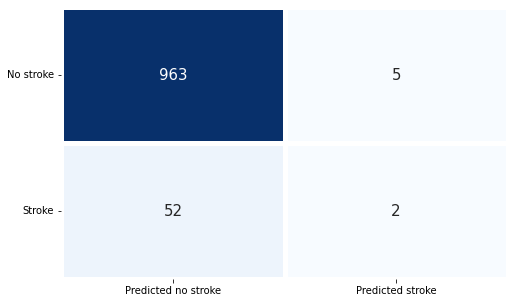

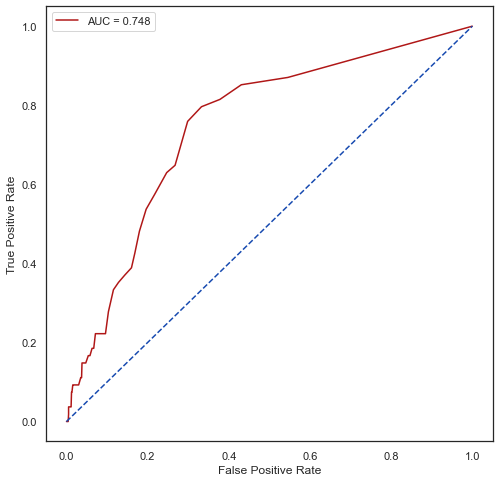

In [33]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Conclusion <a id="13"></a>

Therefore, after the multiple visualizations of our and going through all the performance of the models. I tune the hyperparameters with the help of GridSearch to get models. After that, I came to conclusion that ***RandomForestClassifier*** is best model for this dataset.

### Thank You!

In [34]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,28.893237,never_smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never_smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.000000,never_smoked,1


In [35]:
Female = [1.0, 0.0, 0.0]
Male   = [0.0, 1.0, 0.0]
Other  = [0.0, 0.0, 1.0]

Govt_job      = [1.0, 0.0, 0.0, 0.0, 0.0]              
Never_worked  = [0.0, 1.0, 0.0, 0.0, 0.0]         
Private       = [0.0, 0.0, 1.0, 0.0, 0.0]               
Self_employed = [0.0, 0.0, 0.0, 1.0, 0.0]        
children      = [0.0, 0.0, 0.0, 0.0, 1.0]

Unknown          = [1.0, 0.0, 0.0, 0.0]
formerly_smoked  = [0.0, 1.0, 0.0, 0.0]
never_smoked     = [0.0, 0.0, 1.0, 0.0]
smokes           = [0.0, 0.0, 0.0, 1.0]

In [36]:
gender = 'Male'
work_type= 'Private'
smoking_status= 'formerly_smoked'
age = 67.0
hypertension= 0
heart_disease= 1
ever_married= 'Yes'
Residence_type= 'Urban'
avg_glucose_level= 228.69
bmi= 36.600000

In [37]:
if gender == 'Female':
    new_data = Female
elif gender == 'Male':
    new_data = Male
elif gender == 'Other':
    new_data = Other

if work_type=='Govt_job':
    new_data = new_data + Govt_job
if work_type=='Never_worked':
    new_data = new_data + Never_worked
if work_type=='Private':
    new_data = new_data + Private
if work_type=='Self_employed':
    new_data = new_data + Self_employed
if work_type=='children':
    new_data = new_data + children

if smoking_status == 'Unknown':
    new_data = new_data + Unknown
if smoking_status == 'formerly_smoked':
    new_data = new_data + formerly_smoked
if smoking_status == 'never_smoked':
    new_data = new_data + never_smoked
if smoking_status == 'smokes':
    new_data = new_data + smokes

new_data.insert(len(new_data),age)
new_data.insert(len(new_data),hypertension)
new_data.insert(len(new_data),heart_disease)

if ever_married == "Yes":
    new_data.insert(len(new_data),1)    
if ever_married == "No":
    new_data.insert(len(new_data),0)
    
if Residence_type == "Urban":
    new_data.insert(len(new_data),1)    
if Residence_type == "Rural":
    new_data.insert(len(new_data),0)

new_data.insert(len(new_data),avg_glucose_level)
new_data.insert(len(new_data),bmi)
new_data

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 67.0,
 0,
 1,
 1,
 1,
 228.69,
 36.6]

In [38]:
classifier.predict([new_data])

array([1], dtype=int64)

In [39]:
import pickle

In [40]:
with open('model_pkl', 'wb') as files:
    pickle.dump(classifier, files)